In [8]:
!pip install pmdarima

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\91996\\Desktop\\sky rose whiskey.csv")

In [3]:
print ("shape of data" , df.shape)

shape of data (72, 3)


In [4]:
df['date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

In [5]:
df['date'] = pd.DatetimeIndex(df['date'])

In [6]:
df.head()

,Year,Month,Relative Interest,date
0,2010,1,41,2010-01-01
1,2010,2,42,2010-02-01
2,2010,3,44,2010-03-01
3,2010,4,41,2010-04-01
4,2010,5,39,2010-05-01


In [7]:
df=df[["date","Relative Interest"]]
df.head()

,date,Relative Interest
0,2010-01-01,41
1,2010-02-01,42
2,2010-03-01,44
3,2010-04-01,41
4,2010-05-01,39


In [8]:
df.set_index('date',inplace= True)

In [9]:
df.head()

,Relative Interest
date,
2010-01-01,41
2010-02-01,42
2010-03-01,44
2010-04-01,41
2010-05-01,39


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
decompose_df = seasonal_decompose(df['Relative Interest'],model ="additive")

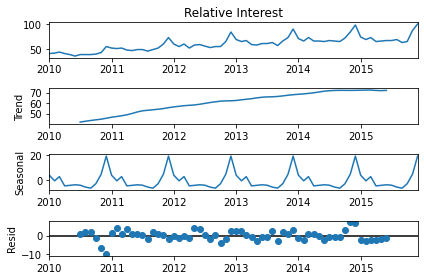

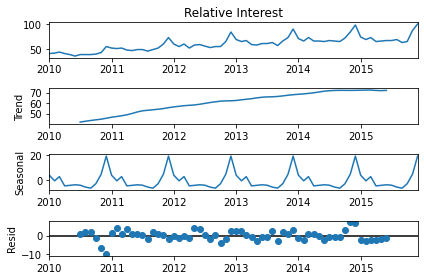

In [12]:
decompose_df.plot()

In [13]:
#plot

<AxesSubplot:xlabel='date'>

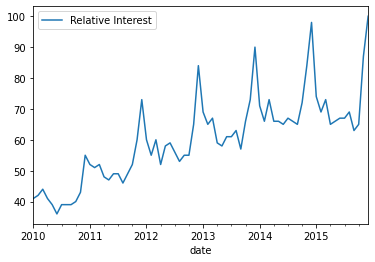

In [14]:
df.plot()

In [15]:
# Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(df['Relative Interest'])

In [17]:
from statsmodels.tsa.stattools import adfuller
def ad_test(test_result):
     dftest = adfuller(test_result, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [18]:
ad_test(df['Relative Interest'])

1. ADF :  -2.991638958697094
2. P-Value :  0.03568262822665955
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


In [19]:
#log

In [20]:
df_log = np.log(df['Relative Interest'])

In [21]:
ad_test(df_log)

1. ADF :  -3.6412890866348695
2. P-Value :  0.005018997687837984
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


<AxesSubplot:xlabel='date'>

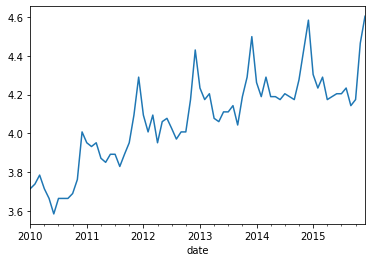

In [22]:
df_log.plot()

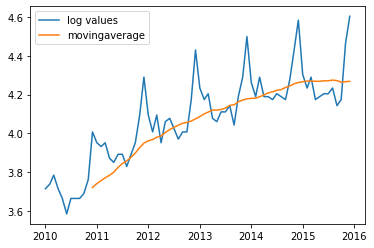

In [23]:
movingaverage = df_log.rolling(window=12).mean()
movingstd = df_log.rolling(window=12).std()
plt.plot(df_log,label='log values')
plt.plot(movingaverage,label='movingaverage')
plt.legend(loc='best')

In [24]:
#differencing

In [25]:
df[' First Difference'] = df['Relative Interest'] - df['Relative Interest'].shift(1)

In [26]:
df['Relative Interest'].shift(1)

date
2010-01-01     NaN
2010-02-01    41.0
2010-03-01    42.0
2010-04-01    44.0
2010-05-01    41.0
              ... 
2015-08-01    67.0
2015-09-01    69.0
2015-10-01    63.0
2015-11-01    65.0
2015-12-01    87.0
Name: Relative Interest, Length: 72, dtype: float64

In [27]:
df['Seasonal  Difference']=df['Relative Interest']-df['Relative Interest'].shift(12)

In [28]:
df.head(14)

,Relative Interest,First Difference,Seasonal Difference
date,,,
2010-01-01,41,NaN,NaN
2010-02-01,42,1.0,NaN
2010-03-01,44,2.0,NaN
2010-04-01,41,-3.0,NaN
2010-05-01,39,-2.0,NaN
2010-06-01,36,-3.0,NaN
2010-07-01,39,3.0,NaN
2010-08-01,39,0.0,NaN
2010-09-01,39,0.0,NaN


In [29]:
## Again test dickey fuller test
ad_test(df['Seasonal  Difference'].dropna())

1. ADF :  -3.783206700025767
2. P-Value :  0.003083882191754592
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


<AxesSubplot:xlabel='date'>

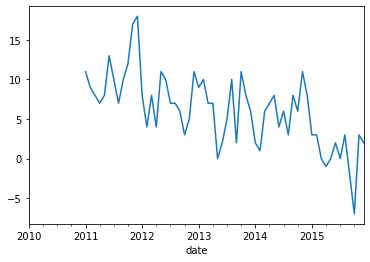

In [30]:
df['Seasonal  Difference'].plot()

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [34]:
import statsmodels.api as sm

D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


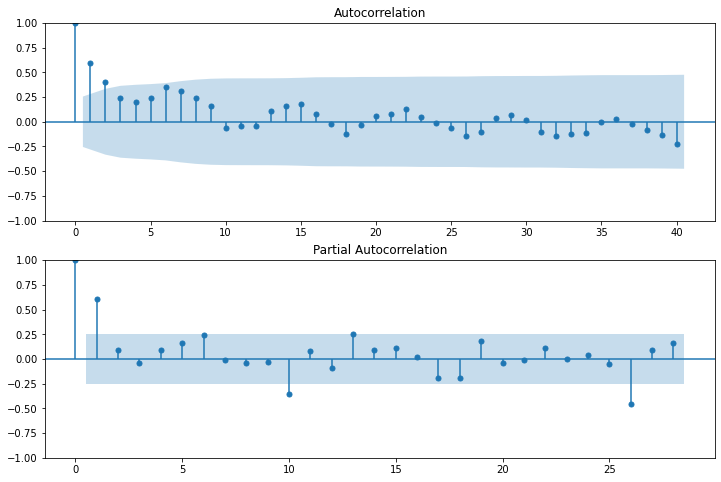

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal  Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal  Difference'].iloc[13:],lags=28,ax=ax2)

In [36]:
#ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.arima.model import ARIMA

In [37]:
model=ARIMA(df['Relative Interest'],order=(1,1,1))
model_fit=model.fit()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Relative Interest   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -243.979
Date:                Wed, 09 Nov 2022   AIC                            493.957
Time:                        05:19:38   BIC                            500.745
Sample:                    01-01-2010   HQIC                           496.656
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6220      0.265      2.348      0.019       0.103       1.141
ma.L1         -0.8681      0.208     -4.181      0.000      -1.275      -0.461
sigma2        56.2617      7.222      7.790      0.000      42.106      70.417
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                11.25
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                             0.80
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

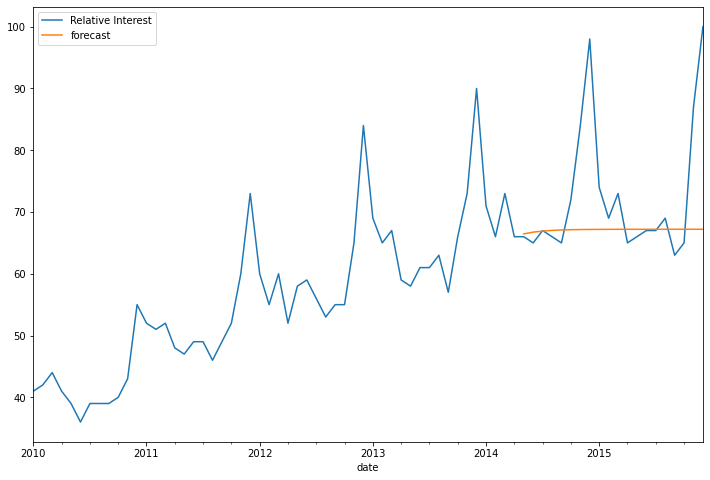

In [39]:
df['forecast']=model_fit.predict(start=52,end=103,dynamic=True)
df[['Relative Interest','forecast']].plot(figsize=(12,8))

In [40]:
import statsmodels.api as sm

In [41]:
model=sm.tsa.statespace.SARIMAX(df['Relative Interest'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

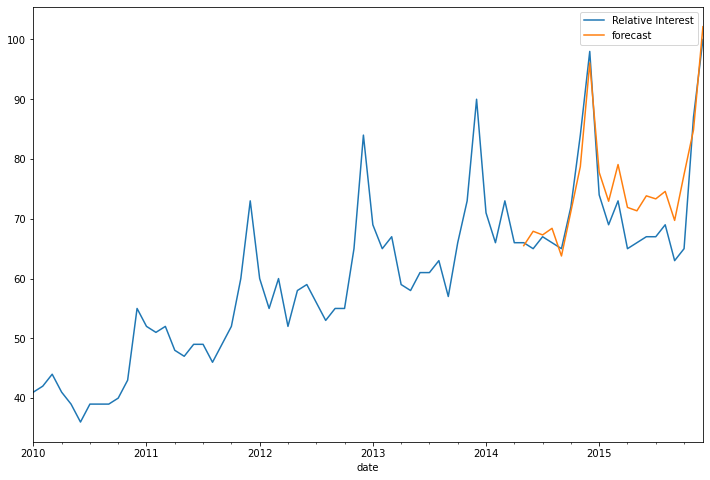

In [42]:
df['forecast']=results.predict(start=52,end=103,dynamic=True)
df[['Relative Interest','forecast']].plot(figsize=(12,8))

In [43]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [44]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [45]:
future_datest_df.tail()

,Relative Interest,First Difference,Seasonal Difference,forecast
2017-07-01,NaN,NaN,NaN,NaN
2017-08-01,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN,NaN


In [46]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

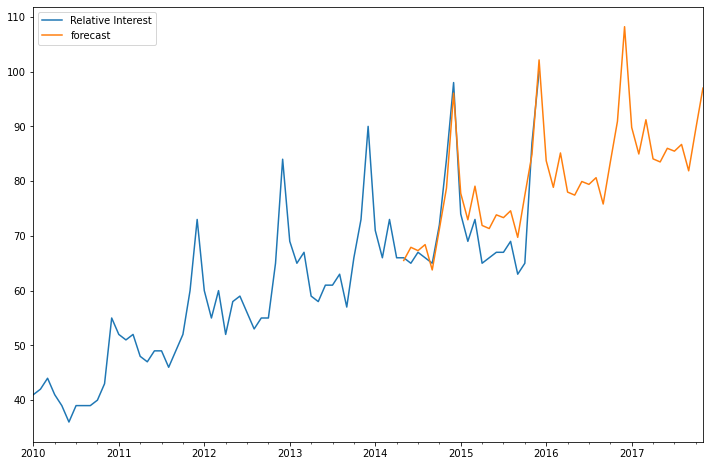

In [47]:
future_df['forecast'] = results.predict(start = 52, end = 120, dynamic= True)  
future_df[['Relative Interest', 'forecast']].plot(figsize=(12, 8)) 

In [51]:
future_df

,Relative Interest,First Difference,Seasonal Difference,forecast
2010-01-01,41,NaN,NaN,NaN
2010-02-01,42,1.0,NaN,NaN
2010-03-01,44,2.0,NaN,NaN
2010-04-01,41,-3.0,NaN,NaN
2010-05-01,39,-2.0,NaN,NaN
...,...,...,...,...
2017-07-01,NaN,NaN,NaN,71.614607
2017-08-01,NaN,NaN,NaN,73.184259
2017-09-01,NaN,NaN,NaN,67.900678
2017-10-01,NaN,NaN,NaN,70.627327
